In [39]:
import pandas as pd
import numpy as np
import umap.umap_ as umap
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift

In [40]:
def draw_projection(emb, name):
    plt.scatter(emb[:, 0], emb[:, 1], c=target)
    plt.title(name)
    plt.show()

def draw_metrics(metric, name_x, name_y, ranges):
    plt.plot(ranges, metric, marker='.')
    plt.xlabel(name_x)
    plt.ylabel(name_y)
    plt.show()

In [41]:
data, target = datasets.load_digits(return_X_y=True, as_frame=True)
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [42]:
data.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_3    0
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Length: 64, dtype: int64

In [43]:
d = preprocessing.normalize(data, axis=0)
data = pd.DataFrame(d, columns=data.columns)
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.016733,0.024387,0.016851,0.002914,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.018762,0.023854,0.018433,0.000000,0.00000,0.0
1,0.0,0.0,0.000000,0.022511,0.024340,0.014572,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.020185,0.029492,0.026284,0.00000,0.0
2,0.0,0.0,0.000000,0.007504,0.028084,0.034972,0.0,0.0,0.0,0.000000,...,0.019118,0.0,0.0,0.0,0.000000,0.005505,0.020276,0.042054,0.04633,0.0
3,0.0,0.0,0.023427,0.028139,0.024340,0.002914,0.0,0.0,0.0,0.050107,...,0.034412,0.0,0.0,0.0,0.021889,0.023854,0.023962,0.023656,0.00000,0.0
4,0.0,0.0,0.000000,0.001876,0.020595,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.003670,0.029492,0.010514,0.00000,0.0


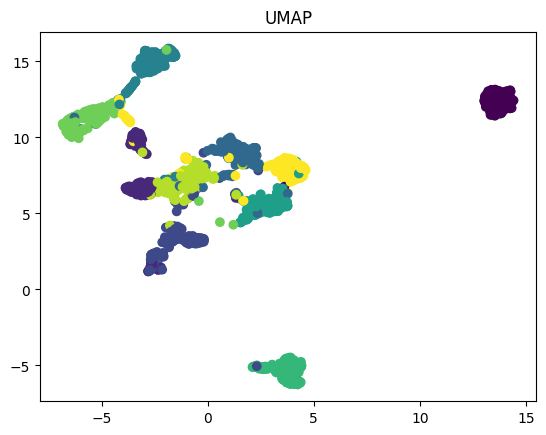

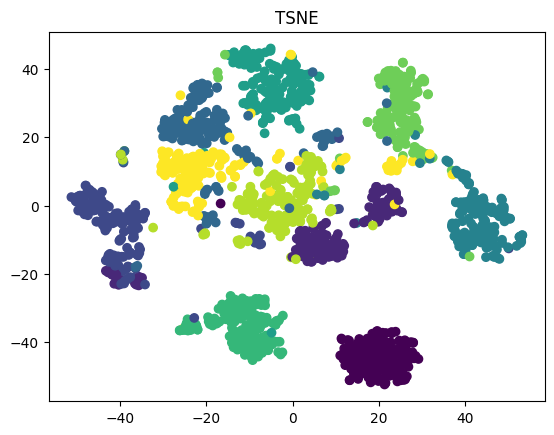

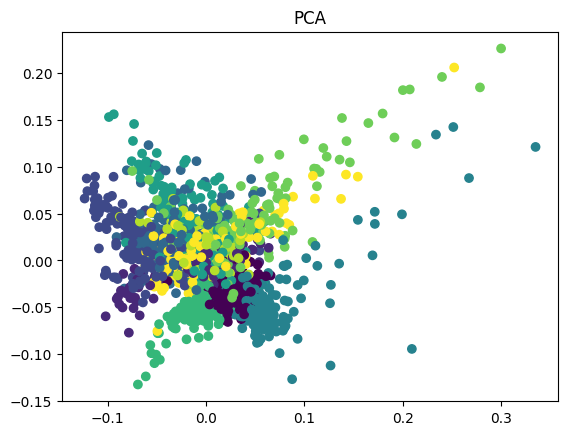

In [44]:
emb0 = umap.UMAP().fit_transform(data)
emb1 = TSNE().fit_transform(data)
emb2 = PCA().fit_transform(data)

draw_projection(emb0, 'UMAP')
draw_projection(emb1, 'TSNE')
draw_projection(emb2, 'PCA')

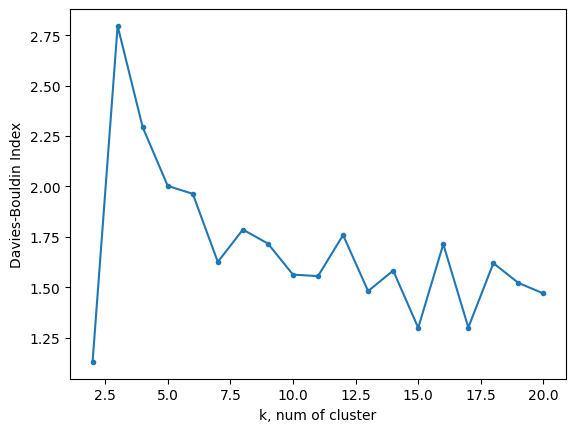

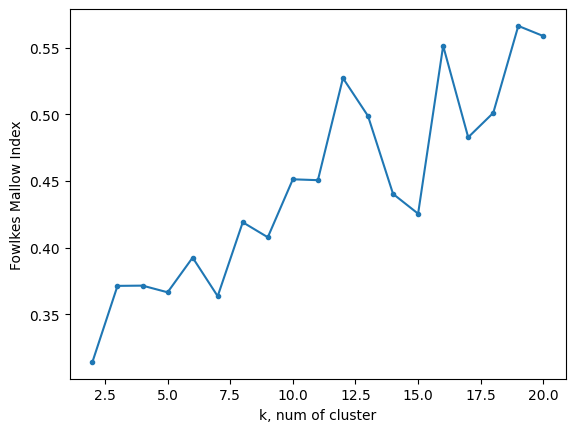

In [47]:
davies_bouldin = []
fm =[]

for k in range(2, 21):
    kmeans = KMeans(n_init='auto', n_clusters=k).fit(data)
    davies_bouldin.append(metrics.davies_bouldin_score(data, kmeans.labels_))
    fm.append((metrics.fowlkes_mallows_score(target, kmeans.labels_)))

draw_metrics(davies_bouldin, 'k, num of cluster', 'Davies-Bouldin Index', range(2, 21))
draw_metrics(fm, 'k, num of cluster', 'Fowlkes Mallow Index', range(2, 21))

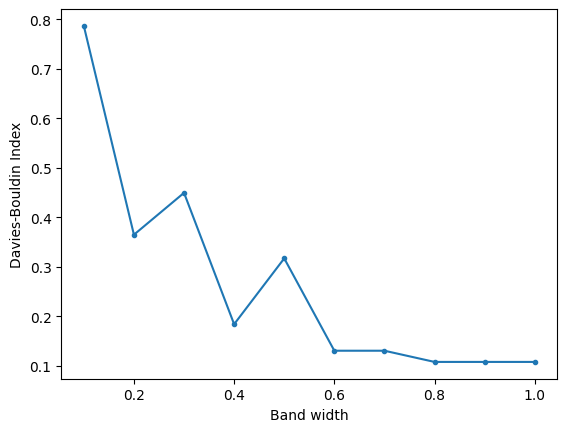

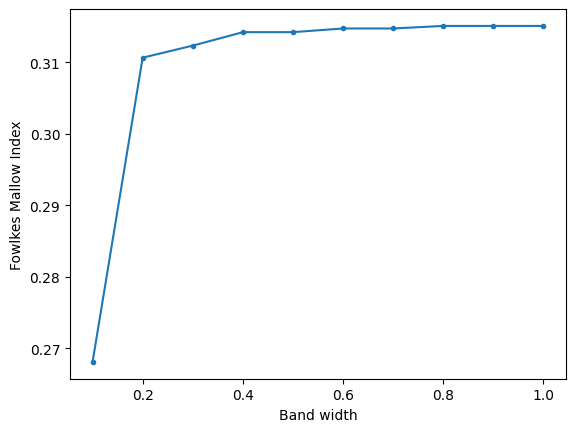

In [46]:
davies_bouldin = []
fm = []
points = np.arange(0.1, 1.1, 0.1)
R = []

for r in points:
    mean_shift = MeanShift(bandwidth=r).fit(data)

    if len(np.unique(mean_shift.labels_)) == 1 or len(np.unique(mean_shift.labels_)) > len(data) - 1:
        continue
    else:
        davies_bouldin.append(metrics.davies_bouldin_score(data, mean_shift.labels_))
        fm.append(metrics.fowlkes_mallows_score(target, mean_shift.labels_))
        R.append(r)

draw_metrics(davies_bouldin, 'Band width', 'Davies-Bouldin Index', R)
draw_metrics(fm, 'Band width', 'Fowlkes Mallow Index', R)